In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
seed_value = 42
tf.random.set_seed(seed_value)

In [4]:
train = ImageDataGenerator(
    rescale =1./255,
    horizontal_flip =True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

train_generator =train.flow_from_directory(
    'equal/train', 
    target_size=(256,256),
    batch_size=32,
    seed=seed_value,
    class_mode='sparse'
    
)

Found 4620 images belonging to 3 classes.


In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Overripe', 'Ripe', 'Unripe']

In [6]:
validation= ImageDataGenerator(
    rescale =1./255,
    horizontal_flip =True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

val_generator =validation.flow_from_directory(
    'equal/val',
    target_size=(256,256),
    batch_size=32,
    class_mode='sparse',
    seed=seed_value
)

Found 1320 images belonging to 3 classes.


In [7]:
test = ImageDataGenerator(
    rescale =1./255,
    horizontal_flip =True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

test_generator =test.flow_from_directory(
    'equal/test',
    target_size=(256,256),
    batch_size=32,
    class_mode='sparse',
    seed=seed_value
)

Found 660 images belonging to 3 classes.


In [8]:
input_shape=(256,256,3)
n_classes= 3

model= models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size =(3,3), activation='relu'), #32filters, relu activation
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size =(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size =(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(), #flattens to 1d array
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [10]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [11]:
steps_per_epoch= int((len(train_generator))//32)
print(steps_per_epoch)

e= len(train_generator)
print(e)
epochs=5

4
145


In [28]:
history= model.fit(
    train_generator,
    batch_size=32,
    epochs= 6,
    validation_data= val_generator,
    validation_steps= 3, 
    verbose=1,
)

Epoch 1/6
145/145 [==============================] - 382s 3s/step - loss: 0.1921 - accuracy: 0.9351 - val_loss: 0.1781 - val_accuracy: 0.9271
Epoch 2/6
145/145 [==============================] - 638s 4s/step - loss: 0.1955 - accuracy: 0.9342 - val_loss: 0.1414 - val_accuracy: 0.9375
Epoch 3/6
145/145 [==============================] - 1632s 11s/step - loss: 0.1785 - accuracy: 0.9396 - val_loss: 0.1597 - val_accuracy: 0.9271
Epoch 4/6
145/145 [==============================] - 1752s 12s/step - loss: 0.2094 - accuracy: 0.9266 - val_loss: 0.2637 - val_accuracy: 0.8958
Epoch 5/6
145/145 [==============================] - 1761s 12s/step - loss: 0.1889 - accuracy: 0.9338 - val_loss: 0.2212 - val_accuracy: 0.9167
Epoch 6/6
145/145 [==============================] - 2124s 15s/step - loss: 0.1714 - accuracy: 0.9396 - val_loss: 0.2386 - val_accuracy: 0.8750


In [29]:
scores=model.evaluate(test_generator)

21/21 [==============================] - 216s 10s/step - loss: 0.1618 - accuracy: 0.9485


In [32]:
acc=history.history['accuracy']
val_acc= history.history['val_accuracy']

loss= history.history['loss']
val_loss= history.history['val_loss']

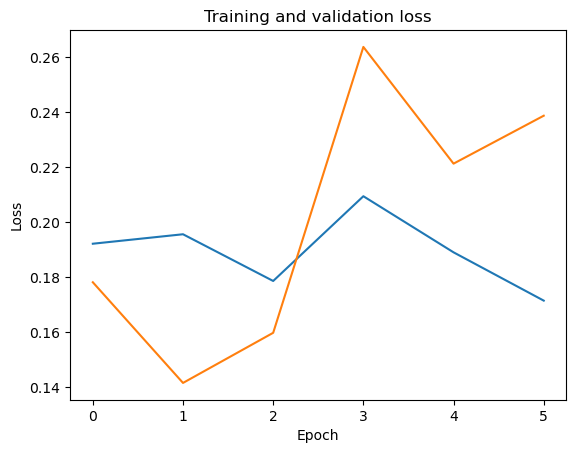

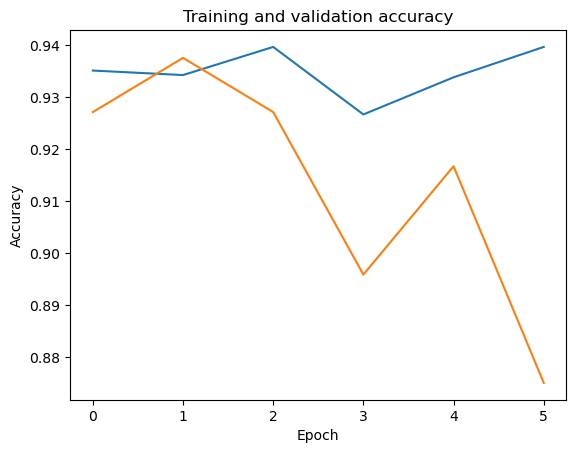

In [33]:
epochs=5
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.show()

first image to predict
actual label: Ripe
1/1 [==============================] - 3s 3s/step
predicted label: Ripe


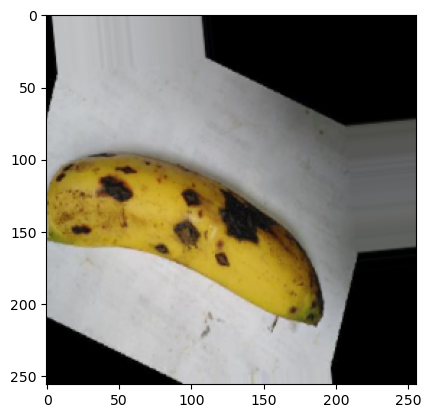

In [34]:
import numpy as np
for image_batch, label_batch in test_generator:
    first_image= image_batch[0]
    first_label = int(label_batch[0])
    
    print('first image to predict' )
    plt.imshow(first_image)
    print('actual label:', class_names[first_label])
    
    batch_prediction= model.predict(image_batch)
    print('predicted label:', class_names[np.argmax(batch_prediction[0])])
    
    break
    

In [35]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 316ms/step


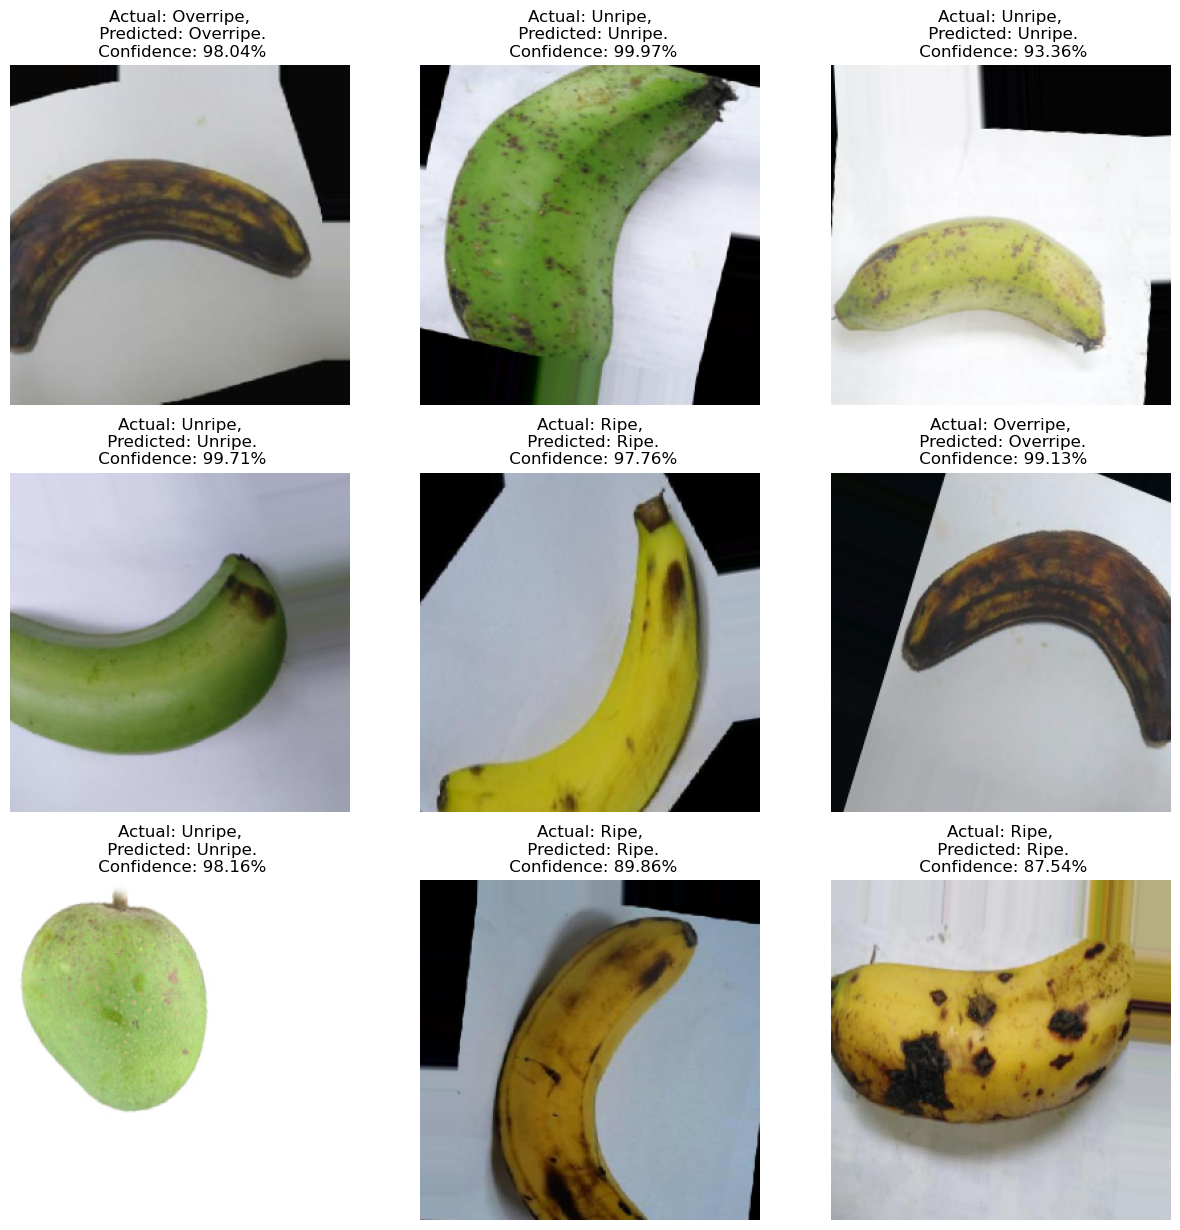

In [36]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [37]:
model.save("equaldataset.h5")

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
predictions = model.predict(test_generator)
true_labels = test_generator.classes
predicted_classes = np.argmax(predictions, axis=1)

21/21 [==============================] - 277s 13s/step


In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
predicted_classes = np.argmax(predictions, axis=1)

precision = precision_score(true_labels, predicted_classes, average='weighted')
recall = recall_score(true_labels, predicted_classes, average='weighted')
f1 = f1_score(true_labels, predicted_classes, average='weighted')

print("\nClassification Report:\n", classification_report(true_labels, predicted_classes))


Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.29      0.30       220
           1       0.35      0.38      0.37       220
           2       0.31      0.31      0.31       220

    accuracy                           0.33       660
   macro avg       0.33      0.33      0.33       660
weighted avg       0.33      0.33      0.33       660



In [ ]:
from keras.models import load_model

saved_model = load_model('equaldataset.h5')

train_loss, train_acc = saved_model.evaluate(train_generator, verbose=0)
val_loss, val_acc = saved_model.evaluate(val_generator , verbose=0)


In [ ]:
test_loss, test_acc = saved_model.evaluate(test_generator, verbose=0)

print(f'Train accuracy: {train_acc*100:.3f}')
print (f'Validation accuracy: {val_acc*100:.3f}')
print (f'Test accuracy: {test_acc*100:.3f}')
print(f'Train loss: {train_loss:.3f}')
print(f'Validation loss: {val_loss:.3f}')
print(f'Test loss: {test_loss:.3f}')

42/42 [==============================] - 46s 1s/step


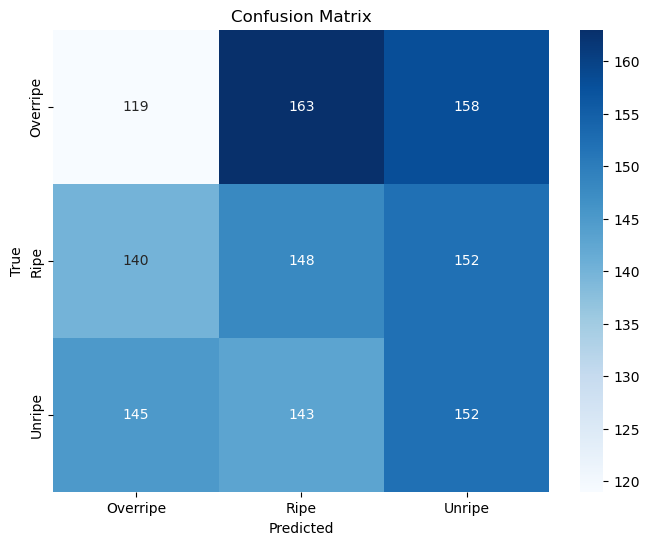

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

val_generator.reset()  
y_true = val_generator.classes  

y_pred_prob = model.predict(val_generator)
y_pred = np.argmax(y_pred_prob, axis=1)  

conf_mat = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=train_generator.class_indices,
            yticklabels=train_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [25]:
print(conf_mat)

[[119 163 158]
 [140 148 152]
 [145 143 152]]
